In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 7000
embedding_dim = 256
max_length = 15
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [3]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "while", "with", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]
punctuations = '''!()-[]{};:'"`\,<>./?@#$%^&*_~\n'''

In [4]:
category = []
subcategory = []
questions = []

with open('train_5500.label', 'r') as f:
    for line in f:
        split_index1 = line.index(":")
        split_index2 = line.index(" ")
        category.append(line[:split_index1])
        subcategory.append(line[split_index1+1:split_index2])
        questions.append(line[(split_index2+1):])
        
print(category[0])
print(subcategory[0])
print(questions[0:10])

DESC
manner
['How did serfdom develop in and then leave Russia ?\n', 'What films featured the character Popeye Doyle ?\n', "How can I find a list of celebrities ' real names ?\n", 'What fowl grabs the spotlight after the Chinese Year of the Monkey ?\n', 'What is the full form of .com ?\n', 'What contemptible scoundrel stole the cork from my lunch ?\n', "What team did baseball 's St. Louis Browns become ?\n", 'What is the oldest profession ?\n', 'What are liver enzymes ?\n', 'Name the scar-faced bounty hunter of The Old West .\n']


In [5]:
for i in range(0,len(questions)):
    question = questions[i].lower()
#     for word in stopwords:
#         token = " " + word + " "
#         question = question.replace(token, " ")
    no_punct = ''
    for char in question:
        if char not in punctuations:
            no_punct = no_punct + char
    no_punct = no_punct.replace("  ", " ")
    questions[i] = no_punct

print(len(category))
print(len(questions))
print(questions[0:10])

5452
5452
['how did serfdom develop in and then leave russia ', 'what films featured the character popeye doyle ', 'how can i find a list of celebrities real names ', 'what fowl grabs the spotlight after the chinese year of the monkey ', 'what is the full form of com ', 'what contemptible scoundrel stole the cork from my lunch ', 'what team did baseball s st louis browns become ', 'what is the oldest profession ', 'what are liver enzymes ', 'name the scarfaced bounty hunter of the old west ']


In [6]:
test_category = []
test_subcategory = []
test_questions = []

with open('TREC_10.label', 'r') as f:
    for line in f:
        split_index1 = line.index(":")
        split_index2 = line.index(" ")
        test_category.append(line[:split_index1])
        test_subcategory.append(line[split_index1+1:split_index2])
        test_questions.append(line[(split_index2+1):])
        
print(test_category[0])
print(test_subcategory[0])
print(test_questions[0:10])

NUM
dist
['How far is it from Denver to Aspen ?\n', 'What county is Modesto , California in ?\n', 'Who was Galileo ?\n', 'What is an atom ?\n', 'When did Hawaii become a state ?\n', 'How tall is the Sears Building ?\n', 'George Bush purchased a small interest in which baseball team ?\n', "What is Australia 's national flower ?\n", 'Why does the moon turn orange ?\n', 'What is autism ?\n']


In [7]:
for i in range(0,len(test_questions)):
    test_question = test_questions[i].lower()
#     for word in stopwords:
#         token = " " + word + " "
#         test_question = test_question.replace(token, " ")
    no_punct = ''
    for char in test_question:
        if char not in punctuations:
            no_punct = no_punct + char
    no_punct = no_punct.replace("  ", " ")
    test_questions[i] = no_punct

print(len(test_category))
print(len(test_questions))
print(test_questions[0:10])

500
500
['how far is it from denver to aspen ', 'what county is modesto california in ', 'who was galileo ', 'what is an atom ', 'when did hawaii become a state ', 'how tall is the sears building ', 'george bush purchased a small interest in which baseball team ', 'what is australia s national flower ', 'why does the moon turn orange ', 'what is autism ']


In [8]:
train_questions = questions
train_category = category
train_subcategory = subcategory

validation_questions = test_questions
validation_category = test_category
validation_subcategory = test_subcategory

print(len(train_questions))
print(len(train_category))
print(len(validation_questions))
print(len(validation_category))

5452
5452
500
500


In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_questions)
word_index = tokenizer.word_index
print(len(word_index))

train_sequences = tokenizer.texts_to_sequences(train_questions)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

8605
9
15
7
15


In [10]:
validation_sequences = tokenizer.texts_to_sequences(validation_questions)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

500
(500, 15)


In [11]:
category_tokenizer = Tokenizer()
category_tokenizer.fit_on_texts(category)
category_word_index = category_tokenizer.word_index

training_category_seq = pad_sequences(np.array(category_tokenizer.texts_to_sequences(train_category)), maxlen=1)
validation_category_seq = pad_sequences(np.array(category_tokenizer.texts_to_sequences(validation_category)), maxlen=1)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Conv1D(128, 3, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),    
#     tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dropout(0.2),
#     gru+lstm over lstm+gru    
#     tf.keras.layers.Dropout(0.2),   defn not with gru+lstm
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'sigmoid'),
    tf.keras.layers.Dense(7, activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.002), metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 15, 256)           1792000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 15, 128)           148224    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 7)                

In [33]:
num_epochs = 20
history = model.fit(train_padded, training_category_seq, epochs = num_epochs, validation_data=(validation_padded, validation_category_seq), verbose = 2)

Train on 5452 samples, validate on 500 samples
Epoch 1/20
5452/5452 - 23s - loss: 1.4655 - acc: 0.3806 - val_loss: 1.1386 - val_acc: 0.4980
Epoch 2/20
5452/5452 - 10s - loss: 0.9824 - acc: 0.6137 - val_loss: 1.0023 - val_acc: 0.7100
Epoch 3/20
5452/5452 - 9s - loss: 0.6636 - acc: 0.8369 - val_loss: 0.6994 - val_acc: 0.8300
Epoch 4/20
5452/5452 - 10s - loss: 0.4475 - acc: 0.9000 - val_loss: 0.7665 - val_acc: 0.8060
Epoch 5/20
5452/5452 - 11s - loss: 0.3482 - acc: 0.9208 - val_loss: 0.7218 - val_acc: 0.8040
Epoch 6/20
5452/5452 - 11s - loss: 0.2690 - acc: 0.9420 - val_loss: 0.6535 - val_acc: 0.8380
Epoch 7/20
5452/5452 - 10s - loss: 0.2465 - acc: 0.9453 - val_loss: 0.6952 - val_acc: 0.8280
Epoch 8/20
5452/5452 - 10s - loss: 0.2008 - acc: 0.9573 - val_loss: 0.6941 - val_acc: 0.8280
Epoch 9/20
5452/5452 - 10s - loss: 0.1666 - acc: 0.9620 - val_loss: 0.6768 - val_acc: 0.8400
Epoch 10/20
5452/5452 - 11s - loss: 0.1407 - acc: 0.9674 - val_loss: 0.8201 - val_acc: 0.8260
Epoch 11/20
5452/5452 -

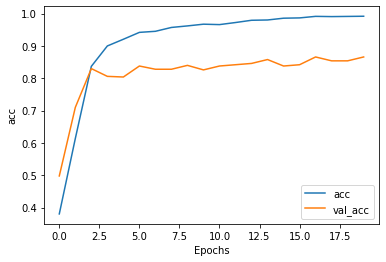

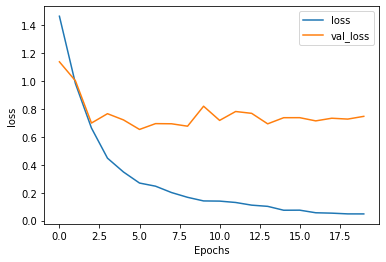

In [34]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [35]:
print(category_word_index)
prediction = (model.predict(validation_padded[-10:]))
for i in prediction:
#     x = i.find(max(i))
    x = (np.where(i == np.amax(i)))[0]
#     print(x)
    for a in category_word_index:
        if category_word_index[a] == x:
            print(a, x)
            
    
print(validation_category_seq[-10:])
print(validation_questions[-10:])

{'enty': 1, 'hum': 2, 'desc': 3, 'num': 4, 'loc': 5, 'abbr': 6}
desc [3]
desc [3]
enty [1]
num [4]
num [4]
hum [2]
enty [1]
num [4]
enty [1]
desc [3]
[[3]
 [3]
 [1]
 [4]
 [4]
 [2]
 [1]
 [4]
 [1]
 [3]]
['what is pectin ', 'what is biodiversity ', 'what s the easiest way to remove wallpaper ', 'what year did the titanic start on its journey ', 'how much of an apple is water ', 'who was the 22nd president of the us ', 'what is the money they use in zambia ', 'how many feet in a mile ', 'what is the birthstone of october ', 'what is ecoli ']


In [36]:
subcategory_tokenizer = Tokenizer()
subcategory_tokenizer.fit_on_texts(subcategory)
subcategory_word_index = subcategory_tokenizer.word_index
print(subcategory_word_index)

training_subcategory_seq = pad_sequences(np.array(subcategory_tokenizer.texts_to_sequences(train_subcategory)), maxlen=1)
validation_subcategory_seq = pad_sequences(np.array(subcategory_tokenizer.texts_to_sequences(validation_subcategory)), maxlen=1)

{'ind': 1, 'other': 2, 'def': 3, 'count': 4, 'desc': 5, 'manner': 6, 'date': 7, 'cremat': 8, 'reason': 9, 'gr': 10, 'country': 11, 'city': 12, 'animal': 13, 'food': 14, 'dismed': 15, 'termeq': 16, 'period': 17, 'money': 18, 'exp': 19, 'state': 20, 'sport': 21, 'event': 22, 'product': 23, 'substance': 24, 'color': 25, 'techmeth': 26, 'dist': 27, 'perc': 28, 'veh': 29, 'word': 30, 'title': 31, 'mount': 32, 'body': 33, 'abb': 34, 'lang': 35, 'plant': 36, 'volsize': 37, 'symbol': 38, 'weight': 39, 'instru': 40, 'letter': 41, 'speed': 42, 'code': 43, 'temp': 44, 'ord': 45, 'religion': 46, 'currency': 47}


In [41]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(96, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    #gru+lstm >> lstm+lstm but loss is still a problem
    #graph smoothened with lr=0.002
    
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(120, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'sigmoid'),
    tf.keras.layers.Dense(48, activation = 'softmax')
])

model1.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.003), metrics=['acc'])
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 15, 256)           1792000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 256)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 15, 192)           203904    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               131584    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 48)                3120      
Total params: 2,138,864
Trainable params: 2,138,864
Non-trainable params: 0
____________________________________________

In [42]:
num_epochs = 20
history1 = model1.fit((train_padded, training_category_seq), training_subcategory_seq, epochs = num_epochs, validation_data=((validation_padded[:-10], validation_category_seq[:-10]), validation_subcategory_seq[:-10]), verbose = 2)

Train on 5452 samples, validate on 490 samples
Epoch 1/20
5452/5452 - 425s - loss: 2.5193 - acc: 0.3696 - val_loss: 2.0339 - val_acc: 0.5898
Epoch 2/20
5452/5452 - 26s - loss: 1.6099 - acc: 0.5992 - val_loss: 1.6107 - val_acc: 0.6347
Epoch 3/20
5452/5452 - 21s - loss: 1.0986 - acc: 0.7241 - val_loss: 1.4512 - val_acc: 0.6510
Epoch 4/20
5452/5452 - 22s - loss: 0.7607 - acc: 0.8063 - val_loss: 1.3533 - val_acc: 0.6714
Epoch 5/20
5452/5452 - 22s - loss: 0.5576 - acc: 0.8591 - val_loss: 1.3453 - val_acc: 0.7082
Epoch 6/20
5452/5452 - 22s - loss: 0.4100 - acc: 0.8984 - val_loss: 1.2796 - val_acc: 0.7102
Epoch 7/20
5452/5452 - 22s - loss: 0.2867 - acc: 0.9303 - val_loss: 1.3524 - val_acc: 0.7204
Epoch 8/20
5452/5452 - 24s - loss: 0.2092 - acc: 0.9488 - val_loss: 1.3183 - val_acc: 0.7408
Epoch 9/20
5452/5452 - 23s - loss: 0.1663 - acc: 0.9622 - val_loss: 1.3574 - val_acc: 0.7531
Epoch 10/20
5452/5452 - 22s - loss: 0.1226 - acc: 0.9740 - val_loss: 1.3815 - val_acc: 0.7592
Epoch 11/20
5452/5452

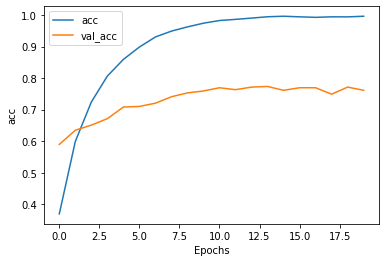

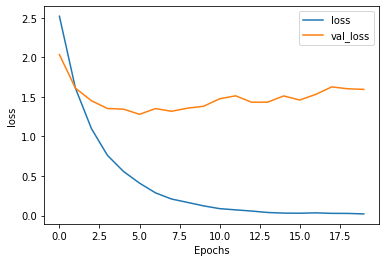

In [43]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history1, "acc")
plot_graphs(history1, "loss")

In [ ]:
print(subcategory_word_index)
prediction = (model1.predict((validation_padded[-10:], validation_category_seq[:-10])))
for i in prediction:
    x = (np.where(i == np.amax(i)))[0]
    print(x)
    for a in subcategory_word_index:
        if subcategory_word_index[a] == x:
            print(a)
    
print(validation_subcategory_seq[-10:])
print(validation_questions[-10:])

{'ind': 1, 'other': 2, 'def': 3, 'count': 4, 'desc': 5, 'manner': 6, 'date': 7, 'cremat': 8, 'reason': 9, 'gr': 10, 'country': 11, 'city': 12, 'animal': 13, 'food': 14, 'dismed': 15, 'termeq': 16, 'period': 17, 'money': 18, 'exp': 19, 'state': 20, 'sport': 21, 'event': 22, 'product': 23, 'substance': 24, 'color': 25, 'techmeth': 26, 'dist': 27, 'perc': 28, 'veh': 29, 'word': 30, 'title': 31, 'mount': 32, 'body': 33, 'abb': 34, 'lang': 35, 'plant': 36, 'volsize': 37, 'symbol': 38, 'weight': 39, 'instru': 40, 'letter': 41, 'speed': 42, 'code': 43, 'temp': 44, 'ord': 45, 'religion': 46, 'currency': 47}
